# Un breve ejemplo de uso de matplotlib empleando las proporciones de las estrellas de ocho puntas

## Las estrellas tarésicas

Los mozárabes y mudéjares llevaron la estrella de ocho puntas por todo el norte de la Península Ibérica y los musulmanes y moriscos la difundieron por el Magreb y el Oriente Medio. Actualmente puede verse en numerosos edificios de España, como en la Alhambra. Leer más en: https://es.wikipedia.org/wiki/Estrella_Tartésica

![title](./img/estrella_teruel.jpg)

In [1]:
import matplotlib.pyplot as plt
import math

# Para dibujar un cuadrado empleamos la función rectangle
# Declaramos una variable "cuadrado" cuyo primer punto estará en el origen (0,0)
# con una longitud de 100 y con un color fc="g" (verde)

cuadrado = plt.Rectangle((0, 0), 100, 100, fc="g")

plt.gca().add_patch(cuadrado)
plt.axis("scaled")
plt.show()

<Figure size 640x480 with 1 Axes>

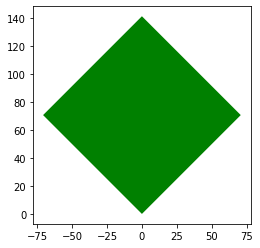

In [2]:
# Para rotar el cuadrado añadimos un valor al atributo angle, en este caso 45°

cuadrado = plt.Rectangle((0, 0), 100, 100, fc="g", angle=45)

plt.gca().add_patch(cuadrado)
plt.axis("scaled")
plt.show()

Podemos dibujar nuestra estrella mudéjar empleando estos dos cuadrados superpuestos, uno sin rotación y uno con una rotación de 45°. No obstante tenemos que tener en cuenta las proporciones y medidas para obtener el resultado deseado, ya que matplot no basta simplemente añadir un ángulo de 45° como podemos ver en el siguiente ejemplo:

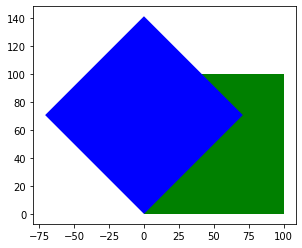

In [3]:
c1 = plt.Rectangle((0, 0), 100, 100, fc="g")
plt.gca().add_patch(c1)
c2 = plt.Rectangle((0, 0), 100, 100, fc="b", angle=45)
plt.gca().add_patch(c2)

plt.axis("scaled")
plt.show()

In [4]:
# Podemos establecer manualmente los valores para ajustar el cuadrado, pero...
# ya puestos en el papel de artesanos mudéjar será más interesante usar las
# las medidas del primer cuadrado para generar las proporciones y medidas del 
# segundo cuadrado

# Declaramos la longitud de nuestro cuadrado
L1 = 100

# Obtenemos la diagonal ya que, a pesar de que los cuatro lados de un cuadrado
# son iguales, su diagonal es más larga ...recuerdos del teorema de pitágoras.
# Usamos una función para calcular la diagonal:

def get_diag(l):
    # Tomamos como entrada la longitud l de un cuadrado y
    # retornamos la longitud multiplicada por la raiz cuadrada de 2
    return math.sqrt(2) * l

D1 = get_diag(L1)

# Nuestro primer cuadrado se encontrará en el origen, pero el segundo tiene que
# centrarse tomando en cuentra las medidas del primero.

# Con una L1 = 100, la x de nuestro cuadrado con rotación debe estar en el punto medio
# del primer cuadrado:
x_r1 = L1/2

# Mientras que la y debe ajustarse usando la medida de su diagonal.Restamos la medida
# de la diagonal a longitud y dividimos entre 2 para matener la simetría de la figura.
y_r1 = (L1-D1)/2


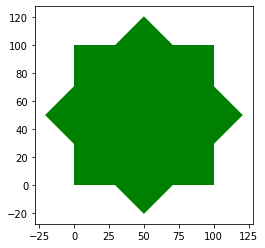

In [5]:
# Mostramos la imagen empleando las variables declaradas anteriormente
# Añadimos el primer cuadrado
plt.axes()
r1_a = plt.Rectangle((0, 0), L1, L1, fc="g")
plt.gca().add_patch(r1_a)

# Añadimos el segundo cuadrado con rotación y coordenadas ajustadas
r1_b = plt.Rectangle((x_r1, y_r1), L1, L1, fc="g", angle=45)
plt.gca().add_patch(r1_b)

plt.axis("scaled")
plt.show()

Hasta aquí todo bien, pero como se ve en la imagen del principio, en el centro de esta estrella, tenemos una estrella más pequeña de color blanco. En la práctica los maestros artesanos tienen segmentos de piezas que crean esta figura.

Siguiendo los pasos para generar la primera estrella, la segunda estrella interior debe de tomar en cuenta las medidas y coordenadas de la primera y tener una proporción armónica because a e s t h e t i c s.

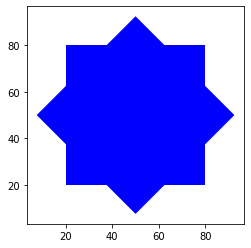

In [6]:
plt.axes()

# Empleamos una longitud de un 60% del tamaño del original, del 40% restante del tamaño original
# quedará un 20% como márgenes laterales
L2 = L1*.60

# Calculamos la diagonal del cuadrado interior
D2 = get_diag(L2)

# Las coordenadas del cuadrado interior deben de tomar de referencia las del original. En el 
# caso del que no tendrá ángulo de rotación calculamos la mitad de la diferencia L1 - L2
xy_r2 = (L1-L2)/2

# El segundo cuadrado interior debe tener una rotación de 45°, de igual forma que el exterior.
# Empleamos la misma coordenada x del cuadrado original, pero asignamos una y tomando como 
# referencia la L1 del cuadrado exterior y la diagonal del cuadrado interior sobre 2.
y_r2 = (L1-D2)/2

r2_a = plt.Rectangle((xy_r2, xy_r2), L2, L2, fc="b") # utilizamos azul para diferenciar
plt.gca().add_patch(r2_a)

r2_b = plt.Rectangle((x_r1, y_r2), L2, L2, fc="b", angle=45)
plt.gca().add_patch(r2_b)

plt.axis("scaled")
plt.show()

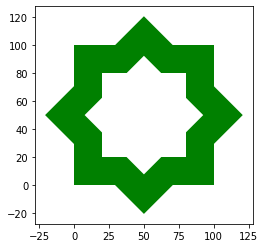

In [7]:
# Ahora podemos aplicar todos los pasos anteriores en una sola figura

plt.axes()

# Declaramos variables para los colores
c1 = "g"
c2 = "w"

# Establecemos las medidas y proporción
L1 = 100
L2 = L1*.60

# Calculamos las diagonales
D1 = get_diag(L1)
D2 = get_diag(L2)

# Calculamos las coordenadas
x_r1 = L1/2
y_r1 = (L1-D1)/2

xy_r2 = (L1-L2)/2
y_r2 = (L1-D2)/2

# Generamos el primer cuadrado exterior
r1_a = plt.Rectangle((0, 0), L1, L1, fc=c1)
plt.gca().add_patch(r1_a)

# Generamos el segundo cuadrado exterior con rotación
r1_b = plt.Rectangle((x_r1, y_r1), L1, L1, fc=c1, angle=45)
plt.gca().add_patch(r1_b)

# Generamos el primer cuadrado interior
r2_a = plt.Rectangle((xy_r2, xy_r2), L2, L2, fc=c2)
plt.gca().add_patch(r2_a)

# Generamos el segundo cuadrado interior con rotación
r2_b = plt.Rectangle((x_r1, y_r2), L2, L2, fc=c2, angle=45)
plt.gca().add_patch(r2_b)

plt.axis("scaled")
plt.show()

Esta es una manera sencilla de dibujar una estrella empleando solamente cuadrados y ángulos, si quisiéramos dibujar exactamente el diseño del patrón tendríamos que tener más cosas en cuenta, por ejemplo: los ángulos entre cada pico, los puntos donde se unen y separan las piezas que la conforman.